<a href="https://colab.research.google.com/github/pagssud/intro-programming-workshop/blob/main/pagsspythonintro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This lession has been adapted from work that is Copyright © Software Carpentry and made available under [Creative Commons Attribution](https://https://creativecommons.org/licenses/by/4.0/) license 

# Lession 2 - Analyzing Patient Data

Questions
* How can I process tabular data files in Python?

Objectives
* Explain what a library is and what libraries are used for.

* Import a Python library and use the functions it contains.

* Read tabular data from a file into a program.

* Select individual values and subsections from data.

* Perform operations on arrays of data.

## Accessing our Dataset

The dataset we will use for this lession is stored in a Github repository. We can access this data by "cloning" the repository by running the cell below:

In [ ]:
!git clone https://github.com/pagssud/intro-programming-workshop

Cloning into 'intro-programming-workshop'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 77 (delta 31), reused 16 (delta 0), pack-reused 0
Unpacking objects: 100% (77/77), 485.02 KiB | 1.87 MiB/s, done.


Click on the folder icon on the left side of the Colab interface. You should see that a new folder called "intro-programming-workshop" has appeared. Within that folder is another folder named "Data", which contains a series of .csv files. Let's see how importing certain libraries can help us open and explore these files.

## Libraries

Words are useful, but what’s more useful are the sentences and stories we build with them. Similarly, while a lot of powerful, general tools are built into Python, specialized tools built up from these basic units live in [libraries](https://carpentries-incubator.github.io/python-novice-programming-gapminder/reference.html#library) that can be called upon when needed.

To begin processing the clinical trial inflammation data, we need to load it into Python. We can do that using a library called NumPy, which stands for Numerical Python. In general, you should use this library when you want to do fancy things with lots of numbers, especially if you have matrices or arrays. To tell Python that we’d like to start using NumPy, we need to import it:

In [ ]:
import numpy as np

Note that I'm using the `as` keyword to create an alias for the `numpy` library, `np` in this case

In [ ]:
np.loadtxt(fname='/content/intro-programming-workshop/data/inflammation-01.csv', delimiter=',')

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

The expression `np.loadtxt(...)` is a function call that asks Python to run the function `loadtxt` which belongs to the `numpy` library. The dot notation in Python is used most of all as an object attribute/property specifier or for invoking its method. `object.property` will give you the `object.property` value, `object_name.method()` will invoke on `object_name` method.

As an example, John Smith is the John that belongs to the Smith family. We could use the dot notation to write his name `smith.john`, just as `loadtxt` is a function that belongs to the `numpy` library.

`numpy.loadtxt` has two parameters: the name of the file we want to read and the delimiter that separates values on a line. These both need to be character strings (or strings for short), so we put them in quotes.

Since we haven’t told it to do anything else with the function’s output, the notebook displays it. In this case, that output is the data we just loaded. By default, only a few rows and columns are shown (with `...` to omit elements when displaying big arrays). Note that, to save space when displaying NumPy arrays, Python does not show us trailing zeros, so `1.0` becomes `1.`.

Our call to `np.loadtxt` read our file but didn’t save the data in memory. To do that, we need to assign the array to a variable. In a similar manner to how we assign a single value to a variable, we can also assign an array of values to a variable using the same syntax. Let’s re-run np.loadtxt and save the returned data:

In [ ]:
data = np.loadtxt(fname='/content/intro-programming-workshop/data/inflammation-01.csv', delimiter=',')

This statement doesn’t produce any output because we’ve assigned the output to the variable `data`. If we want to check that the data have been loaded, we can print the variable’s value:

In [ ]:
print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


Now that the `data` are in memory, we can manipulate them. First, let’s ask what type of thing `data` refers to:

In [ ]:
print(type(data))

<class 'numpy.ndarray'>


The output tells us that `data` currently refers to an N-dimensional array, the functionality for which is provided by the NumPy library. These data correspond to arthritis patients’ inflammation. The rows are the individual patients, and the columns are their daily inflammation measurements.

### Data type

A Numpy array contains one or more elements of the same type. The `type` function will only tell you that a variable is a NumPy array but won’t tell you the type of thing inside the array. We can find out the type of the data contained in the NumPy array.

In [ ]:
print(data.dtype)

float64


This tells us that the NumPy array’s elements are [floating-point numbers](https://swcarpentry.github.io/python-novice-inflammation/reference.html#floating-point-number).

With the following command, we can see the array’s shape:


In [ ]:
print(data.shape)

(60, 40)


The output tells us that the `data` array variable contains 60 rows and 40 columns. When we created the variable `data` to store our arthritis data, we did not only create the array; we also created information about the array, called members or attributes. This extra information describes `data` in the same way an adjective describes a noun. `data.shape` is an attribute of `data` which describes the dimensions of data. We use the same dotted notation for the attributes of variables that we use for the functions in libraries because they have the same part-and-whole relationship.

If we want to get a single number from the array, we must provide an index in square brackets after the variable name, just as we do in math when referring to an element of a matrix. Our inflammation data has two dimensions, so we will need to use two indices to refer to one specific value:

In [ ]:
print('first value in data:', data[0, 0])

first value in data: 0.0


In [ ]:
print('middle value in data:', data[30, 20])

middle value in data: 13.0


The expression `data[30, 20]` accesses the element at row 30, column 20. While this expression may not surprise you, `data[0, 0]` might. Programming languages like Fortran, MATLAB and R start counting at 1 because that’s what human beings have done for thousands of years. Languages in the C family (including C++, Java, Perl, and Python) count from 0 because it represents an offset from the first value in the array (the second value is offset by one index from the first value). This is closer to the way that computers represent arrays (if you are interested in the historical reasons behind counting indices from zero, you can read [Mike Hoye’s blog post](https://exple.tive.org/blarg/2013/10/22/citation-needed/)). As a result, if we have an M×N array in Python, its indices go from 0 to M-1 on the first axis and 0 to N-1 on the second. It takes a bit of getting used to, but one way to remember the rule is that the index is how many steps we have to take from the start to get the item we want.

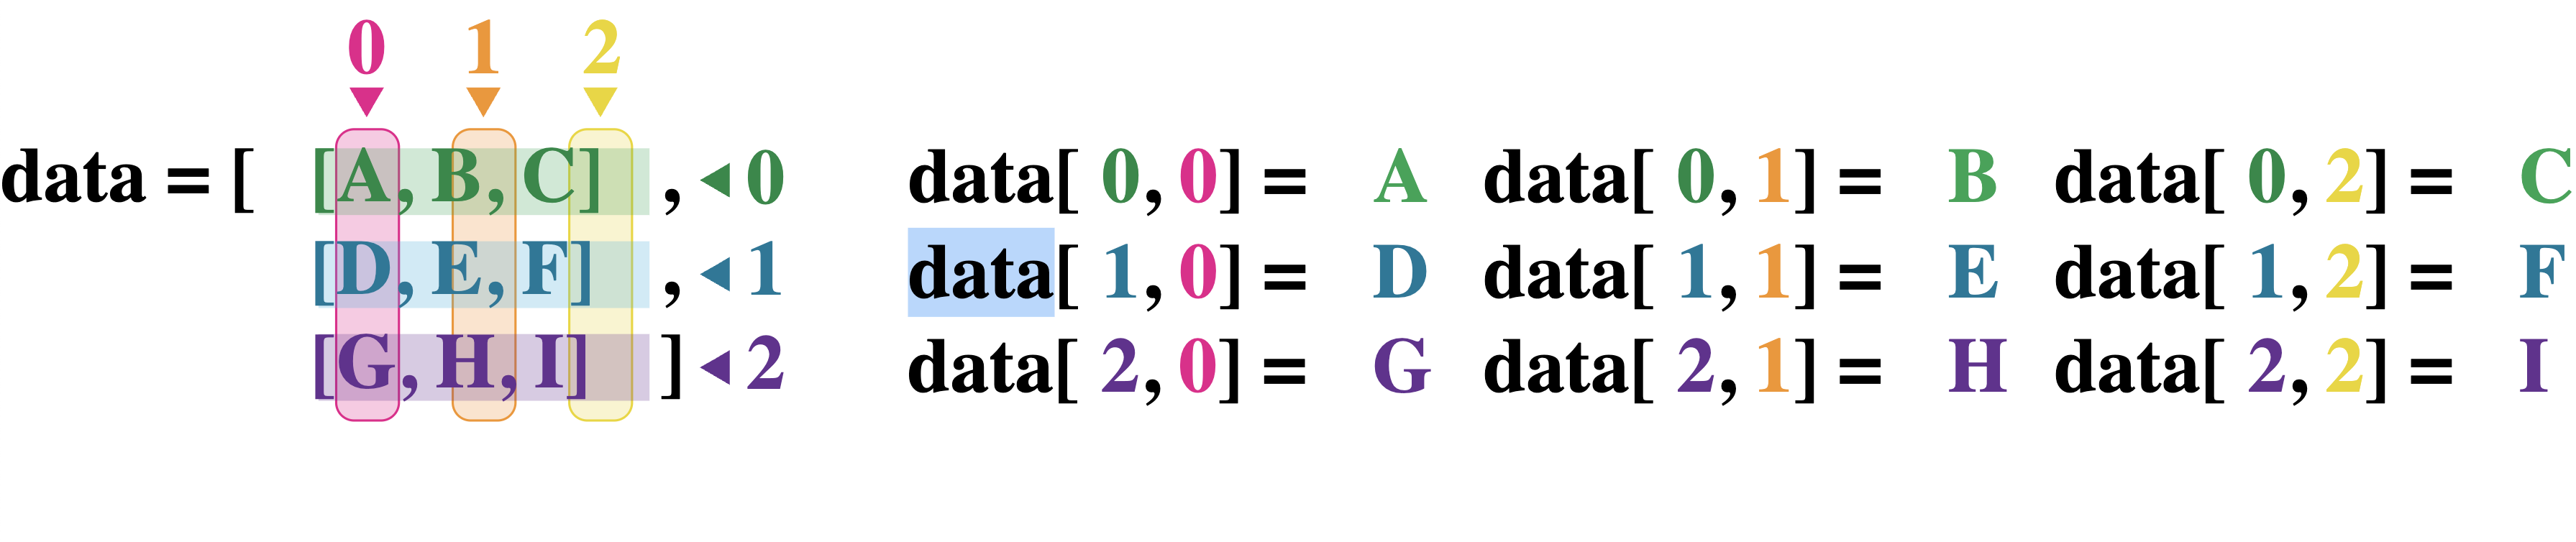

What may also surprise you is that when Python displays an array, it shows the element with index `[0, 0]` in the upper left corner rather than the lower left. This is consistent with the way mathematicians draw matrices but different from the Cartesian coordinates. The indices are (row, column) instead of (column, row) for the same reason, which can be confusing when plotting data.

## Slicing Data

An index like `[30, 20]` selects a single element of an array, but we can select whole sections as well. For example, we can select the first ten days (columns) of values for the first four patients (rows) like this:

In [ ]:
print(data[0:4, 0:10])

[[0. 0. 1. 3. 1. 2. 4. 7. 8. 3.]
 [0. 1. 2. 1. 2. 1. 3. 2. 2. 6.]
 [0. 1. 1. 3. 3. 2. 6. 2. 5. 9.]
 [0. 0. 2. 0. 4. 2. 2. 1. 6. 7.]]


The slice 0:4 means, “Start at index 0 and go up to, but not including, index 4”. Again, the up-to-but-not-including takes a bit of getting used to, but the rule is that the difference between the upper and lower bounds is the number of values in the slice.

We don’t have to start slices at 0:

In [ ]:
print(data[5:10, 0:10])

[[0. 0. 1. 2. 2. 4. 2. 1. 6. 4.]
 [0. 0. 2. 2. 4. 2. 2. 5. 5. 8.]
 [0. 0. 1. 2. 3. 1. 2. 3. 5. 3.]
 [0. 0. 0. 3. 1. 5. 6. 5. 5. 8.]
 [0. 1. 1. 2. 1. 3. 5. 3. 5. 8.]]


We also don’t have to include the upper and lower bound on the slice. If we don’t include the lower bound, Python uses 0 by default; if we don’t include the upper, the slice runs to the end of the axis, and if we don’t include either (i.e., if we use ‘:’ on its own), the slice includes everything:

In [ ]:
small = data[:3, 36:]
print('small is:')
print(small)

small is:
[[2. 3. 0. 0.]
 [1. 1. 0. 1.]
 [2. 2. 1. 1.]]


The above example selects rows 0 through 2 and columns 36 through to the end of the array.

## Analyzing Data

NumPy has several useful functions that take an array as input to perform operations on its values. If we want to find the average inflammation for all patients on all days, for example, we can ask NumPy to compute `data`’s mean value:

In [ ]:
print(np.mean(data))

6.14875


`mean` is a function that takes an array as an argument.

When analyzing data, though, we often want to look at variations in statistical values, such as the maximum inflammation per patient or the average inflammation per day. One way to do this is to create a new temporary array of the data we want, then ask it to do the calculation:

In [ ]:
patient_0 = data[0, :] # 0 on the first axis (rows), everything on the second (columns)
print('maximum inflammation for patient 0:', np.max(patient_0))

maximum inflammation for patient 0: 18.0


Everything in a line of code following the ‘#’ symbol is a comment that is ignored by Python. Comments allow programmers to leave explanatory notes for other programmers or their future selves.

We don’t actually need to store the row in a variable of its own. Instead, we can combine the selection and the function call:



In [ ]:
print('maximum inflammation for patient 2:', np.max(data[2, :]))

maximum inflammation for patient 2: 19.0


What if we need the maximum inflammation for each patient over all days (as in the next diagram on the left) or the average for each day (as in the diagram on the right)? As the diagram below shows, we want to perform the operation across an axis:

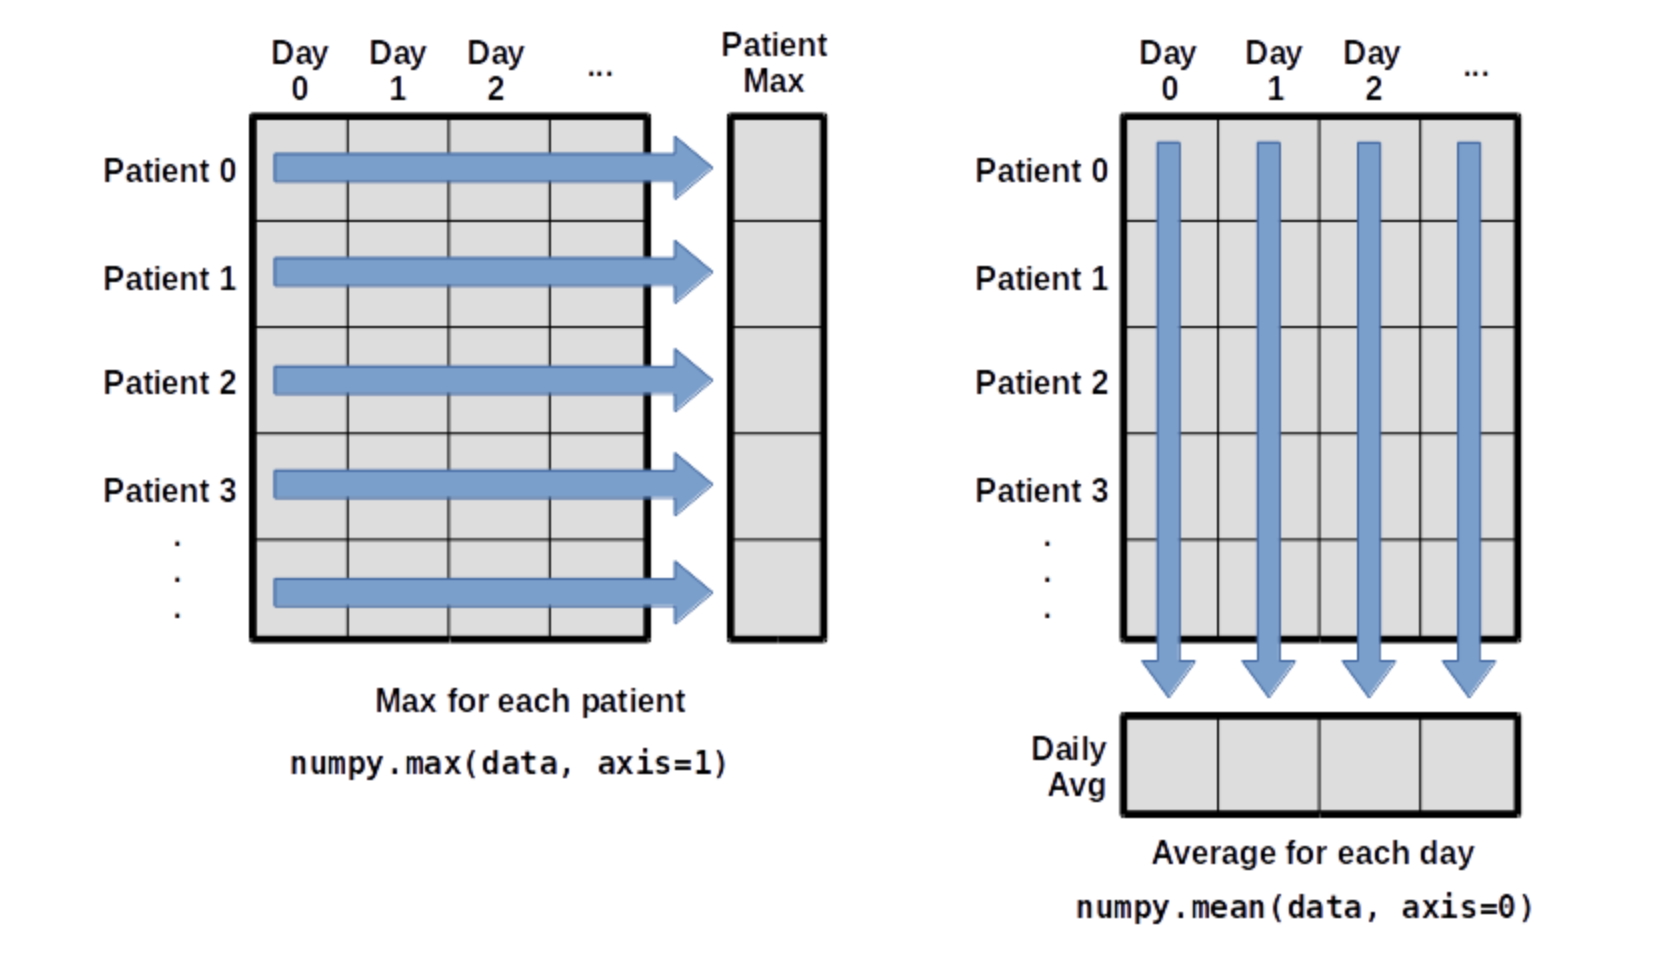

To support this functionality, most array functions allow us to specify the axis we want to work on. If we ask for the average across axis 0 (rows in our 2D example), we get:



In [ ]:
print(np.mean(data, axis=0))

[ 0.          0.45        1.11666667  1.75        2.43333333  3.15
  3.8         3.88333333  5.23333333  5.51666667  5.95        5.9
  8.35        7.73333333  8.36666667  9.5         9.58333333 10.63333333
 11.56666667 12.35       13.25       11.96666667 11.03333333 10.16666667
 10.          8.66666667  9.15        7.25        7.33333333  6.58333333
  6.06666667  5.95        5.11666667  3.6         3.3         3.56666667
  2.48333333  1.5         1.13333333  0.56666667]


As a quick check, we can ask this array what its shape is:

In [ ]:
print(np.mean(data, axis=0).shape)


(40,)


The expression `(40,)` tells us we have an N×1 vector, so this is the average inflammation per day for all patients. If we average across axis 1 (columns in our 2D example), we get:

In [ ]:
print(np.mean(data, axis=1))

[5.45  5.425 6.1   5.9   5.55  6.225 5.975 6.65  6.625 6.525 6.775 5.8
 6.225 5.75  5.225 6.3   6.55  5.7   5.85  6.55  5.775 5.825 6.175 6.1
 5.8   6.425 6.05  6.025 6.175 6.55  6.175 6.35  6.725 6.125 7.075 5.725
 5.925 6.15  6.075 5.75  5.975 5.725 6.3   5.9   6.75  5.925 7.225 6.15
 5.95  6.275 5.7   6.1   6.825 5.975 6.725 5.7   6.25  6.4   7.05  5.9  ]


which is the average inflammation per patient across all days.



### Slicing Strings

A section of an array is called a slice. We can take slices of character strings as well:

In [ ]:
element = 'oxygen'
print('first three characters:', element[0:3])
print('last three characters:', element[3:6])

first three characters: oxy
last three characters: gen


What is the value of `element[:4]`? What about `element[4:]`? Or `element[:]`?

In [ ]:
#@title Solution { display-mode: "form" }
print(element[:4])
print(element[4:])
print(element[:])

### Slicing Strings II  
Given those answers, explain what `element[1:-1]` does.

In [ ]:
#@title Solution { display-mode: "form" }
#Creates a substring from index 1 up to (not including) the final index, effectively removing the first and last letters from ‘oxygen’
print(element[1:-1])

### Slicing Strings III

How can we rewrite the slice for getting the last three characters of `element`, so that it works even if we assign a different string to `element`? Test your solution with the following strings: `carpentry`, `clone`, `hi`.

In [ ]:
#@title Solution { display-mode: "form" }
element = 'oxygen'
print('last three characters:', element[-3:])
element = 'carpentry'
print('last three characters:', element[-3:])
element = 'clone'
print('last three characters:', element[-3:])
element = 'hi'
print('last three characters:', element[-3:])

### Thin Slices

The expression `element[3:3]` produces an empty string, i.e., a string that contains no characters. If data holds our array of patient data, what does `data[3:3, 4:4]` produce? What about `data[3:3, :]`?

In [ ]:
#@title Solution { display-mode: "form" }
print(element[3:3])
print(data[3:3,4:4])
print(data[3:3, :])

## Stacking Arrays

Arrays can be concatenated and stacked on top of one another, using NumPy’s `vstack` and `hstack` functions for vertical and horizontal stacking, respectively.

In [ ]:
A = np.array([[1,2,3], [4,5,6], [7, 8, 9]])
print('A = ')
print(A)

B = np.hstack([A, A])
print('B = ')
print(B)

C = np.vstack([A, A])
print('C = ')
print(C)

A = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
B = 
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]
 [7 8 9 7 8 9]]
C = 
[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]
 [4 5 6]
 [7 8 9]]


Write some additional code that slices the first and last columns of `A`, and stacks them into a 3x2 array. Make sure to `print` the results to verify your solution.

In [ ]:
#@title Solution { display-mode: "form" }

#A ‘gotcha’ with array indexing is that single dimensions are dropped by default. 
#That means `A[:, 0]` is a one dimensional array, which won’t stack as desired. 
#To preserve single dimensions, the index itself can be a slice or array. 
#For example, `A[:, :1]` returns a two dimensional array with one single dimension (i.e. a column vector).

D = np.hstack((A[:, :1], A[:, -1:]))
print('D = ')
print(D)

In [ ]:
#@title Alternate Solution { display-mode: "form" }
#An alternative way to achieve the same result is to use Numpy’s delete function to remove the second column of `A`.

D = np.delete(A, 1, 1)
print('D = ')
print(D)

## Change in inflammation

The patient data is longitudinal in the sense that each row represents a series of observations relating to one individual. This means that the change in inflammation over time is a meaningful concept. Let’s find out how to calculate changes in the data contained in an array with NumPy.

The `np.diff()` function takes an array and returns the differences between two successive values. Let’s use it to examine the changes each day across the first week of patient 3 from our inflammation dataset.

In [ ]:
patient3_week1 = data[3, :7]
print(patient3_week1)

[0. 0. 2. 0. 4. 2. 2.]


Calling `np.diff(patient3_week1)` would do the following calculations

In [ ]:
[ 0 - 0, 2 - 0, 0 - 2, 4 - 0, 2 - 4, 2 - 2 ]

[0, 2, -2, 4, -2, 0]

In [ ]:
np.diff(patient3_week1)

array([ 0.,  2., -2.,  4., -2.,  0.])

Note that the array of differences is shorter by one element (length 6).

When calling `np.diff` with a multi-dimensional array, an `axis` argument may be passed to the function to specify which axis to process. When applying numpy.diff to our 2D inflammation array data, which axis would we specify?

In [ ]:
#@title Solution { display-mode: "form" }

#Since the row axis (0) is patients, it does not make sense to get the difference between two arbitrary patients. 
#The column axis (1) is in days, so the difference is the change in inflammation – a meaningful concept.

np.diff(data, axis=1)

###Change in Inflammation II

If the shape of an individual data file is (60, 40) (60 rows and 40 columns), what would the shape of the array be after you run the diff() function and why?

In [ ]:
#@title Solution { display-mode: "form" }
#The shape will be `(60, 39)` because there is one fewer difference between columns than there are columns in the data.

### Change in Inflammtion III

How would you find the largest change in inflammation for each patient? Does it matter if the change in inflammation is an increase or a decrease?



In [ ]:
#@title Solution { display-mode: "form" }

#By using the `np.max()` function after you apply the `np.diff()` function, you will get the largest difference between days.

np.max(np.diff(data, axis=1), axis=1)

If inflammation values decrease along an axis, then the difference from one element to the next will be negative. If you are interested in the magnitude of the change and not the direction, the np.absolute() function will provide that.

Notice the difference if you get the largest absolute difference between readings.

In [ ]:
np.max(np.absolute(np.diff(data, axis=1)), axis=1)

array([12., 14., 11., 13., 11., 13., 10., 12., 10., 10., 10., 12., 13.,
       10., 11., 10., 12., 13.,  9., 10., 13.,  9., 12.,  9., 12., 11.,
       10., 13.,  9., 13., 11., 11.,  8., 11., 12., 13.,  9., 10., 13.,
       11., 11., 13., 11., 13., 13., 10.,  9., 10., 10.,  9.,  9., 13.,
       10.,  9., 10., 11., 13., 10., 10., 12.])

## Key Points

* Import a library into a program using import libraryname.

* Use the numpy library to work with arrays in Python.

* The expression array.shape gives the shape of an array.

* Use array[x, y] to select a single element from a 2D array.

* Array indices start at 0, not 1.

* Use low:high to specify a slice that includes the indices from low to high-1.

* Use # some kind of explanation to add comments to programs.

* Use np.mean(array), np.max(array), and np.min(array) to calculate simple statistics.

* Use np.mean(array, axis=0) or np.mean(array, axis=1) to calculate statistics across the specified axis.

## Challenge Question

So far we've been working with 1D and 2D arrays, but arrays can have higher orders of dimensions as well. The following cell creates a 3D array of data, or data 'cube', that has the shape `(3, 12, 7)`. Let's say that that this array contains inflammation data for three hospitals, each with twelve patients, across the seven days of a week. In other words, the first axis of the cube represents Hospitals 1, 2, and 3, the second axis represents Patients 1-12, and the third axis represents days 1-7 of the week. Answer the following questions by writing a single line of code for each. Use the `.shape` attribute of numpy arrays to check that your answer has the proper dimensions. Note that there is more than one way to answer each questions!

In [ ]:
np.random.seed(100)
data3D = np.random.rand(3,12,7)
data3D.shape

(3, 12, 7)

### Question 1

Display the daily average inflammation across all patients in Hospital 3

*Hint: This should return a 1D array with 7 elements for each day of the week*

In [ ]:
#@title Solution A { display-mode: "form" }
np.mean(data3D[2,:,:], axis=0)

In [ ]:
#@title Solution B { display-mode: "form" }
data3D.mean(axis=1)[2]

### Question 2


Display the daily change in inflammation for Patients 1, 2, and 3 in Hospital 1

*Hint: This should return a 2D array with shape (3, 6)*

*3 rows for the 3 patients and 6 columns for 7 days of the week (7 minus 1 because we are taking the **differences** between each day)*

In [ ]:
#@title Solution A { display-mode: "form" }
np.diff(data3D[0,0:3,:])

In [ ]:
#@title Solution B { display-mode: "form" }
np.diff(data3D, axis=2)[0,0:3]